In [14]:
#!pip3 install multiprocess
from multiprocessing import Poo
l
import math
import numpy as np
import pandas as pd
# !pip3 install tqdm

import matplotlib.pyplot as plt
from tqdm import tqdm

ImportError: cannot import name 'Poo' from 'multiprocessing' (/usr/lib/python3.8/multiprocessing/__init__.py)

In [15]:
def arrangement_1(nleds,d):

    l=math.sqrt(nleds);

    ledcord=np.zeros((2,nleds));

    temp=0;
    for k in range(nleds):
        ledcord[0,k]=-(l-1)*d/2 +((k)%l)*d;
        if (k)%l ==0 and k != 0:
            temp=temp+1;
        ledcord[1,k]=-(l-1)*d/2 + temp*d;

    return ledcord

def E_xy_cent(ledcord,nleds,Ir_0,z,d):
    
    x=0;
    y=0;
    E=0;
    for i in range(nleds):
        den=np.square(np.square(x-ledcord[0,i]) +np.square(y-ledcord[1,i]) +z**2);
        E= E + (z**2 * Ir_0)*(np.reciprocal(den));

    return E;
    
def E_xy_end(ledcord,nleds,Ir_0,z,d,x_end):
    
    x=x_end;
    y=0;
    E=0;
    for i in range(nleds):
        den=np.square(np.square(x-ledcord[0,i]) +np.square(y-ledcord[1,i]) +z**2);
        E= E + (z**2 * Ir_0)*(np.reciprocal(den));

    return E;

def plot_E_xy_full(ledcord,nleds,Ir_0,z,d):
    l=math.sqrt(nleds)
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-10, 10, 0.01)

    x,y=np.meshgrid(x, y, sparse=False, indexing='ij')

    E=np.zeros(np.size(x));

    for i in range(nleds):
        den=np.square(np.square(x-ledcord[0,i]) +np.square(y-ledcord[1,i]) +z**2);
        E= E + (z**2 * Ir_0)*(np.reciprocal(den));
        
    return E;

#     s=surface(x,y,E);
#     xlabel('x-coordinate(m)');
#     ylabel('y-coordinate(m)');
#     zlabel('Irradinace(W/m^2)');
#     s.EdgeColor = 'none';


In [16]:
nleds=49;
Ir_0 = 1;
d=0.122292;
z=0.05;
ledcord = arrangement_1(nleds,d);
x_end=0.0;
print(E_xy_end(ledcord,nleds,Ir_0,z,d,x_end))

450.9825479895467


In [101]:
Ir_0 = 1;

# print(plot_E_xy_full(ledcord,nleds,Ir_0,z,d))
# E_cent=E_xy_cent(ledcord,nleds,Ir_0,z,d)
# E_half = E_cent/2
# E_99 = E_cent * 0.99
# x_half = 0
# x_99 = 0
# x_half_flag = False
# x_99_flag = False

final_list = []


def ratio(nleds):
    for d in np.linspace(0.01,0.2,38):
        ledcord = arrangement_1(nleds,d)
        for z in np.linspace(0.05,0.5,45):
            E_cent = E_xy_cent(ledcord,nleds,Ir_0,z,d)
            E_half = E_cent/2
            E_99 = E_cent * 0.99
            x_half = 0
            x_99 = 0
            x_half_flag = False
            x_99_flag = False

            for x_end in np.linspace(0,5,10000):



                E_end=E_xy_end(ledcord,nleds,Ir_0,z,d,x_end)

                if E_end < E_half and not x_half_flag:
                    x_half = x_end
                    x_half_flag = True

                if E_end < E_99 and not x_99_flag:
                    x_99 = x_end
                    x_99_flag = True

            final_list.append([nleds,d,z,E_cent,E_99, x_99,E_half,x_half])
    return final_list

with Pool(7) as p:
      l = list(tqdm(p.imap(ratio,[1,9,25,49,81,121,169]), total=7))
# pool=Pool();
# l=pool.map(ratio,np.linspace(0.01,0.2,10))
# #     ratio(d)

100%|██████████| 7/7 [02:57<00:00, 25.32s/it]


In [102]:
t=[]
for i in l:
    t.extend(i)
final_list=t

In [103]:
df = pd.DataFrame(final_list,columns=["nleds","d","z","E_cent","E_99","x_99","E_half","x_half"])

In [104]:
df["ratio"]=df["x_99"]/df["x_half"]

In [105]:
len(df["E_half"].unique())

610

In [106]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df

,nleds,d,z,E_cent,E_99,x_99,E_half,x_half,ratio
0,1,0.010000,0.05,400.000000,396.000000,0.005005,200.000000,0.035035,0.142857
1,1,0.010000,0.10,100.000000,99.000000,0.010010,50.000000,0.065065,0.153846
2,1,0.010000,0.15,44.444444,44.000000,0.015015,22.222222,0.100100,0.150000
3,1,0.010000,0.20,25.000000,24.750000,0.015015,12.500000,0.130130,0.115385
4,1,0.010000,0.25,16.000000,15.840000,0.020020,8.000000,0.165165,0.121212
5,1,0.010000,0.30,11.111111,11.000000,0.025025,5.555556,0.195195,0.128205
6,1,0.010000,0.35,8.163265,8.081633,0.025025,4.081633,0.230230,0.108696
7,1,0.010000,0.40,6.250000,6.187500,0.030030,3.125000,0.260260,0.115385
8,1,0.010000,0.45,4.938272,4.888889,0.035035,2.469136,0.290290,0.120690
9,1,0.010000,0.50,4.000000,3.960000,0.040040,2.000000,0.325325,0.123077


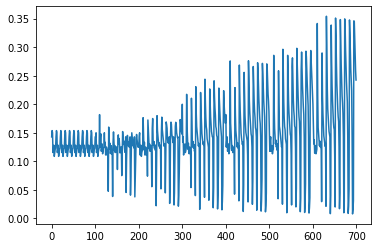

In [107]:
plt.plot(df["ratio"])

In [108]:
len(df["ratio"].unique())

341

In [109]:
# ratio_max=max(df["ratio"])


In [130]:
idx = df.groupby(['nleds'])['ratio'].transform(max) == df['ratio']
df[idx]

,nleds,d,z,E_cent,E_99,x_99,E_half,x_half,ratio
1,1,0.010000,0.10,100.000000,99.000000,0.010010,50.000000,0.065065,0.153846
11,1,0.031111,0.10,100.000000,99.000000,0.010010,50.000000,0.065065,0.153846
21,1,0.052222,0.10,100.000000,99.000000,0.010010,50.000000,0.065065,0.153846
31,1,0.073333,0.10,100.000000,99.000000,0.010010,50.000000,0.065065,0.153846
41,1,0.094444,0.10,100.000000,99.000000,0.010010,50.000000,0.065065,0.153846
51,1,0.115556,0.10,100.000000,99.000000,0.010010,50.000000,0.065065,0.153846
61,1,0.136667,0.10,100.000000,99.000000,0.010010,50.000000,0.065065,0.153846
71,1,0.157778,0.10,100.000000,99.000000,0.010010,50.000000,0.065065,0.153846
81,1,0.178889,0.10,100.000000,99.000000,0.010010,50.000000,0.065065,0.153846
91,1,0.200000,0.10,100.000000,99.000000,0.010010,50.000000,0.065065,0.153846


In [127]:
ef=df[df["ratio"] == df["ratio"].max()]
max(ef["E_cent"])

565.7771163330495